In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


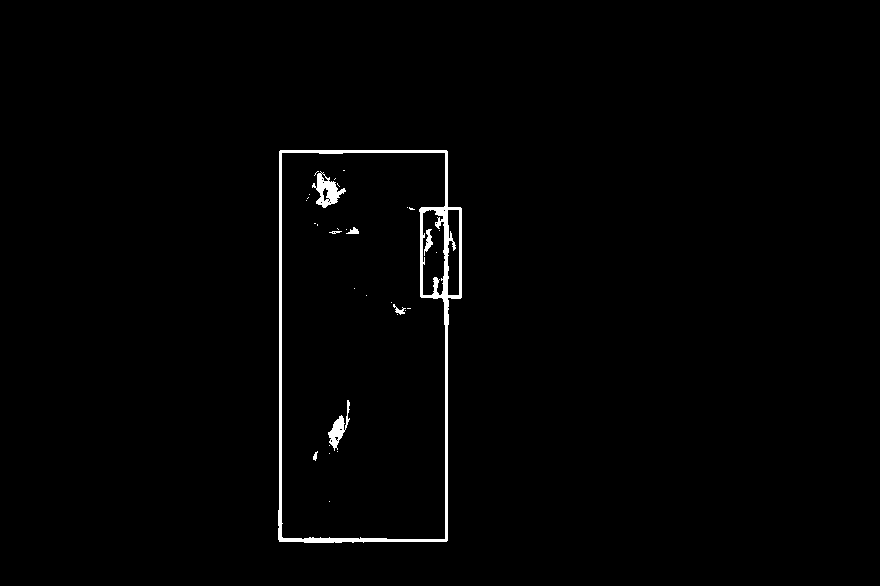

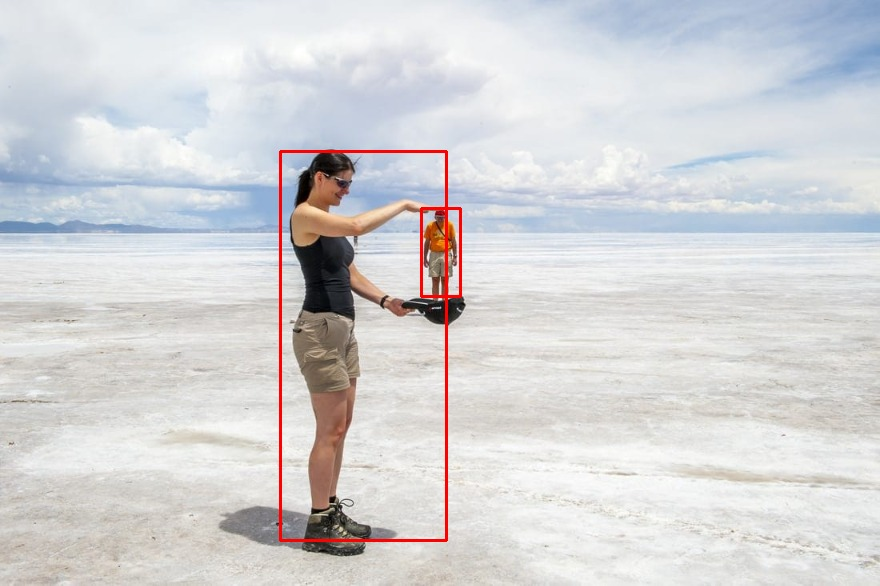

In [3]:
img = cv2.imread('/content/drive/MyDrive/RWDS/smallpic.jpeg')
img = np.array(img)
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# Range for lower red
lower_red = np.array([0,120,70])
upper_red = np.array([10,255,255])
mask1 = cv2.inRange(hsv, lower_red, upper_red)

# Range for upper range
lower_red = np.array([170,120,70])
upper_red = np.array([180,255,255])
mask2 = cv2.inRange(hsv,lower_red,upper_red)
#mask:
mask = mask1+mask2
cv2_imshow(mask)
cv2_imshow(img)


In [4]:
output = cv2.bitwise_and(img, img, mask=mask)
ret,thresh = cv2.threshold(mask, 20, 255, 9)
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#cv2_imshow(output)
#imgray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
#ret, thresh = cv2.threshold(imgray, 127, 255, 0)
#contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

#cv2_imshow(np.hstack([img, output]))
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
sorted_contours= sorted(contours, key=cv2.contourArea, reverse=True)
x,y,w,h = cv2.boundingRect(sorted_contours[2])
x1,y1,w1,h1 = cv2.boundingRect(sorted_contours[3])
print(x)
print(y)
print(h)
print(w)
print(h1)


422
209
87
24
87


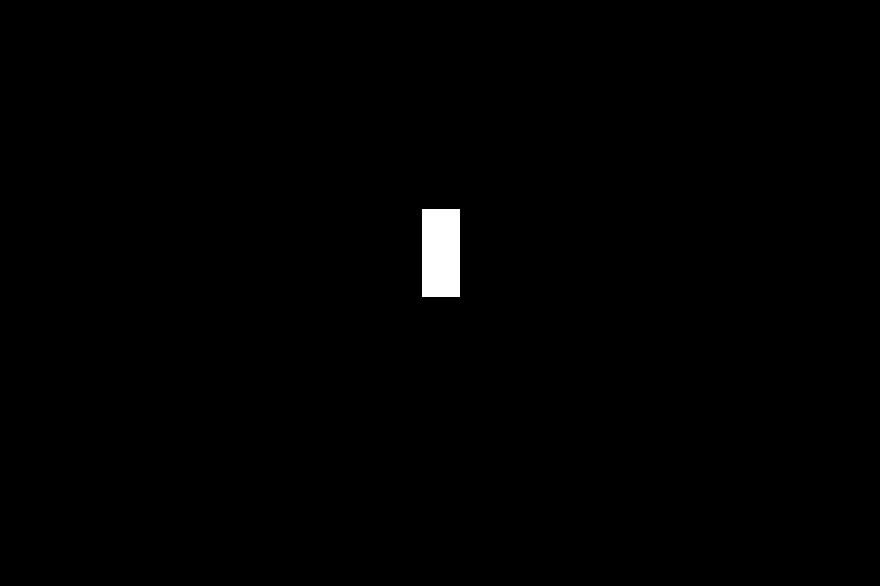

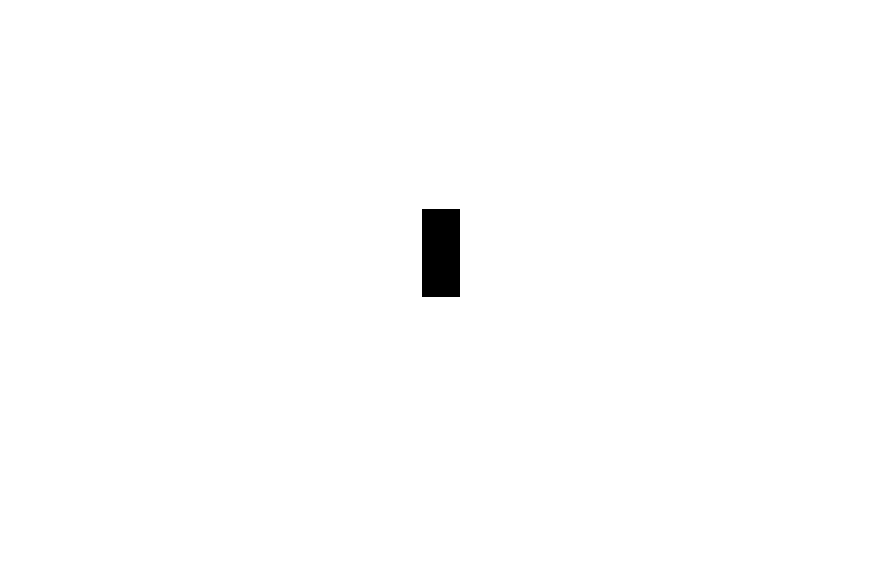

True

In [5]:
start_point = (x,y)
end_point = (x+w+w1,y+h)
color1 = (0,0,0)
color = (255,255,255)
thickness = -1
image = cv2.rectangle(img,start_point,end_point,color1,thickness)
inpaintmask = np.zeros(image.shape[:2],np.uint8)
mask1 = cv2.rectangle(inpaintmask,start_point,end_point,color,thickness)
cv2_imshow(mask1)
ic = cv2.subtract(255,mask1)
cv2_imshow(ic)
cv2.imwrite('/content/drive/MyDrive/RWDS/mask.png',ic)